In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('birds.csv',sep=',',low_memory=False)
df.head()
df.describe()

,Bird,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
count,49.00000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,25.00000,157.979592,241.326531,31.459184,18.469388,20.826531
std,14.28869,3.654277,5.067822,0.794753,0.564286,0.991374
min,1.00000,152.000000,230.000000,30.100000,17.200000,18.600000
25%,13.00000,155.000000,238.000000,30.900000,18.100000,20.200000
50%,25.00000,158.000000,242.000000,31.500000,18.500000,20.700000
75%,37.00000,161.000000,245.000000,32.000000,18.800000,21.500000
max,49.00000,165.000000,252.000000,33.400000,19.800000,23.100000


In [4]:
#Cantidad de observaciones en este caso 49
X = df
n = X.shape[0]
#matriz transpuesta
X.T
# #La matriz identidad de tamaño n
np.eye(n)
# #Es una matriz de unos de tamaño nxn, se calcula asi:
np.ones((n,n))
#Obtener la matriz de covarianzas, asi: Calcula la matriz S
S = X.T /(n-1) @ (np.eye(n) - np.ones((n,n)) / n) @ X
# #imprimir la matriz S
print(S)


                              Bird  Longitud Total  Extension de las alas  \
Bird                    204.166667       13.104167               4.770833   
Longitud Total           13.104167       13.353741              13.610969   
Extension de las alas     4.770833       13.610969              25.682823   
Longitud pico y cabeza    0.722917        1.922066               2.713605   
Longitud del homero      -0.014583        1.330612               2.197704   
Longitud de la quilla    -0.229167        2.192219               2.657823   

                        Longitud pico y cabeza  Longitud del homero  \
Bird                                  0.722917            -0.014583   
Longitud Total                        1.922066             1.330612   
Extension de las alas                 2.713605             2.197704   
Longitud pico y cabeza                0.631633             0.342266   
Longitud del homero                   0.342266             0.318418   
Longitud de la quilla             

In [5]:
#Matriz de covarianza
print('\n')
COV=np.cov(X.T)
print(COV)



[[ 2.04166667e+02  1.31041667e+01  4.77083333e+00  7.22916667e-01
  -1.45833333e-02 -2.29166667e-01]
 [ 1.31041667e+01  1.33537415e+01  1.36109694e+01  1.92206633e+00
   1.33061224e+00  2.19221939e+00]
 [ 4.77083333e+00  1.36109694e+01  2.56828231e+01  2.71360544e+00
   2.19770408e+00  2.65782313e+00]
 [ 7.22916667e-01  1.92206633e+00  2.71360544e+00  6.31632653e-01
   3.42266156e-01  4.14647109e-01]
 [-1.45833333e-02  1.33061224e+00  2.19770408e+00  3.42266156e-01
   3.18418367e-01  3.39370748e-01]
 [-2.29166667e-01  2.19221939e+00  2.65782313e+00  4.14647109e-01
   3.39370748e-01  9.82823129e-01]]


In [7]:
#obtencion de los valores propios, con el modulo linalg y la funcion eigh que retorna los autovalores de una matriz simetrica(los autovalores se muestran en una lista ascendente)
#calcula y guarda los valores de la descomposicion espectral 
autovalores, autovectores = np.linalg.eig(S)
print(autovalores, '\n \nAutovalores Asociados') # Muesta los autovalores de la matriz S
print(autovectores) #Muestra los autovectores asociados a la matriz S
print('\n')

[2.05247945e+02 3.46181611e+01 4.27980835e+00 6.00244118e-01
 7.72836959e-02 3.12663510e-01] 
 
Autovalores Asociados
[[ 9.96997674e-01  6.40030394e-02 -4.15941494e-02  1.29269202e-02
   1.16297663e-03 -8.47625047e-04]
 [ 7.03984433e-02 -5.20072885e-01  8.30661246e-01 -1.80347521e-01
   1.49059371e-02  4.26934599e-02]
 [ 3.19048040e-02 -8.36551827e-01 -5.39264121e-01 -4.59252519e-02
  -3.91202914e-02  6.86862900e-02]
 [ 4.60819421e-03 -9.68564009e-02  4.19773023e-02  2.32200125e-01
  -3.55241597e-01 -8.99289730e-01]
 [ 7.36103335e-04 -7.57831457e-02 -5.65354177e-03  1.96594677e-01
   9.27798287e-01 -3.07839702e-01]
 [ 6.27033671e-05 -1.02394328e-01  1.25187746e-01  9.34147832e-01
  -1.06017969e-01  2.99952403e-01]]




In [10]:
#Inicialmente verificamos que la traza de la matriz S (funcion trace de numpy) es igual a la suma de los autovalres, que calculamos en el paso anterior
print("Suma de los autovalores")
print(sum(autovalores))
print('\nSuma de la traza de la matriz')
print(np.trace(S))
#la suma y la traza dela matriz deben ser iguales. 

Suma de los autovalores
245.13610544218488

Suma de la traza de la matriz
245.1361054421846


In [14]:
# La proporcio de variabilidad explicada por cada componente la podemos calcular con:
prop = autovalores / np.trace(S)
#porcentaje = (autovalores / np.trace(S))*100
print("Proporcion de la variabilidad por cada componente")
print(prop)
# en porcentaje seria:
print("\nPorcentaje de la variabilidad")
#Ordenar los autovectores que obtuvimos de mayor a menor
y = sorted((prop*100), reverse = True)
print(y)

Proporcion de la variabilidad por cada componente
[8.37281576e-01 1.41220164e-01 1.74589065e-02 2.44861570e-03
 3.15268515e-04 1.27546903e-03]

 Porcentaje de la variabilidad
[83.72815759545045, 14.122016428336833, 1.745890651672805, 0.24486157049126894, 0.1275469025526169, 0.03152685149614073]


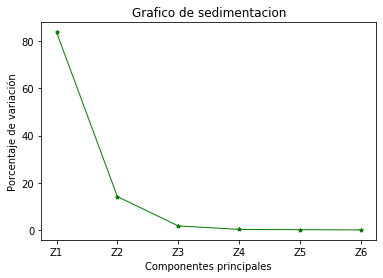

In [16]:
#Grafico de sedimentacion, permite representar el porcentaje de variacion explicado por cada componente o factor en las ordenadas
#y los componentes en orden decreciente en la abscisas con la finalidad de escoger los factores que retengan mas variacion

plt.plot(["Z1", "Z2", "Z3", "Z4","Z5","Z6"], y, color ="green", marker ='*', linewidth=1, markersize=4)
plt.title("Grafico de sedimentacion")
plt.xlabel("Componentes principales")
plt.ylabel("Porcentaje de variación")
plt.show()

In [22]:
#Estandarizacion de las variables
scaler = StandardScaler()
DFT = scaler.fit_transform(df) # calcula media y desviacion estandar
print([DFT[:,0].mean(),DFT[:,1].mean(),DFT[:,0].std(),DFT[:,1].std()])


[-4.5315225494904345e-18, -1.291483926604774e-15, 1.0, 1.0]


In [51]:
#Calculo de los componentes principales
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(DFT)

#print(principalComponents)
# principalDf = pd.DataFrame(data = principalComponents
#               , columns = ['principal component 1', 'principal component 2'])
# principalDf.describe()

# #Creamos un objeto PCA y aplicamos
# escala=StandardScaler()# estandarizar las variables
# escala.fit(cuanti)# calcula media y desviacion estandar
# CuantiScale=escala.transform(cuanti)
# print(CuantiScale)
#Creamos un objeto PCA y aplicamos
pca=PCA(n_components=2) # Otra opcion pca=PCA(.85)
pca.fit(DFT)
principalComponents=pca.transform(DFT) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("Ajuste de PCA", DFT.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

Ajuste de PCA (49, 6)
[0.60440389 0.17565058]
suma: 0.7800544755202731


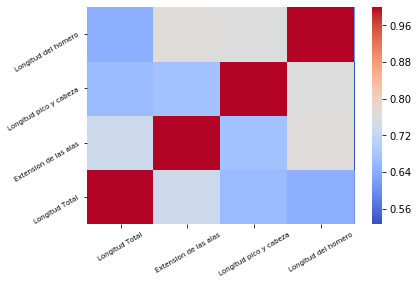

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,1:6].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [53]:
df.iloc[:,1:6].cov()

,Longitud Total,Extension de las alas,Longitud pico y cabeza,Longitud del homero,Longitud de la quilla
Longitud Total,13.353741,13.610969,1.922066,1.330612,2.192219
Extension de las alas,13.610969,25.682823,2.713605,2.197704,2.657823
Longitud pico y cabeza,1.922066,2.713605,0.631633,0.342266,0.414647
Longitud del homero,1.330612,2.197704,0.342266,0.318418,0.339371
Longitud de la quilla,2.192219,2.657823,0.414647,0.339371,0.982823


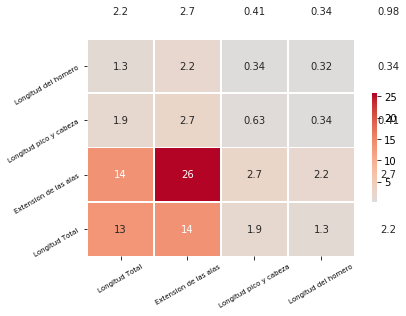

In [54]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots()
s=sns.heatmap(df.iloc[:,1:6].cov(),cmap='coolwarm', center=0,
             linewidths=.5, cbar_kws={"shrink": .5},annot=True) 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
ax.set_xlim(0,4)
ax.set_ylim(0,4)
plt.show()

In [55]:
pca.components_

array([[-0.06309985, -0.45428581, -0.46062181, -0.44942619, -0.46824359,
        -0.39526499],
       [ 0.95394136,  0.21073238, -0.02122818, -0.04372013, -0.14183205,
        -0.15201752]])

In [56]:
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:5]))

[0.60440389 0.17565058]
suma: 0.7800544755202731


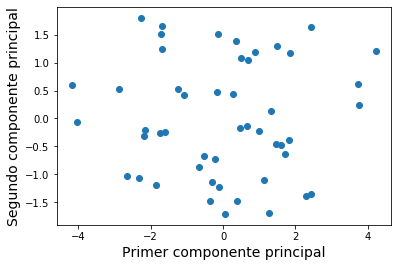

In [58]:
#graficamos en 2 Dimensiones, tomando los 2 primeros componentes principales
Xax=principalComponents[:,0]
Yax=principalComponents[:,1]
plt.scatter(Xax, Yax) 
plt.xlabel("Primer componente principal",fontsize=14)
plt.ylabel("Segundo componente principal",fontsize=14)
plt.show()